# Example quantitative plots

How to plot the results of the quantitative evaluation.

In [1]:
import numpy as np
import os
import fnmatch
import pandas as pd
import sklearn.metrics as sm
import scipy.stats as ss
import matplotlib.pyplot as plt

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluationPlotter as DCEP

If you have multiple networks trained, you can add them to the `nets_list` below, and they will be plotted together.

In [2]:
folder_name = "caterpillar_3"
path_to_nets = os.path.join("data/pdc/trained_models", folder_name)
path_to_nets = utils.convert_to_absolute_path(path_to_nets)
all_nets = sorted(os.listdir(path_to_nets))
nets_to_plot = []

nets_list = ["gt_3"]
nets_list.append("default_scaling_pred_depth_gt_pose_3")
nets_list.append("no_scaling_pred_depth_gt_pose_3")


for net in nets_list:
    nets_to_plot.append(os.path.join(folder_name,net))

# Training 
Evaluate the network on the training scenes. Correspondences are all within scene

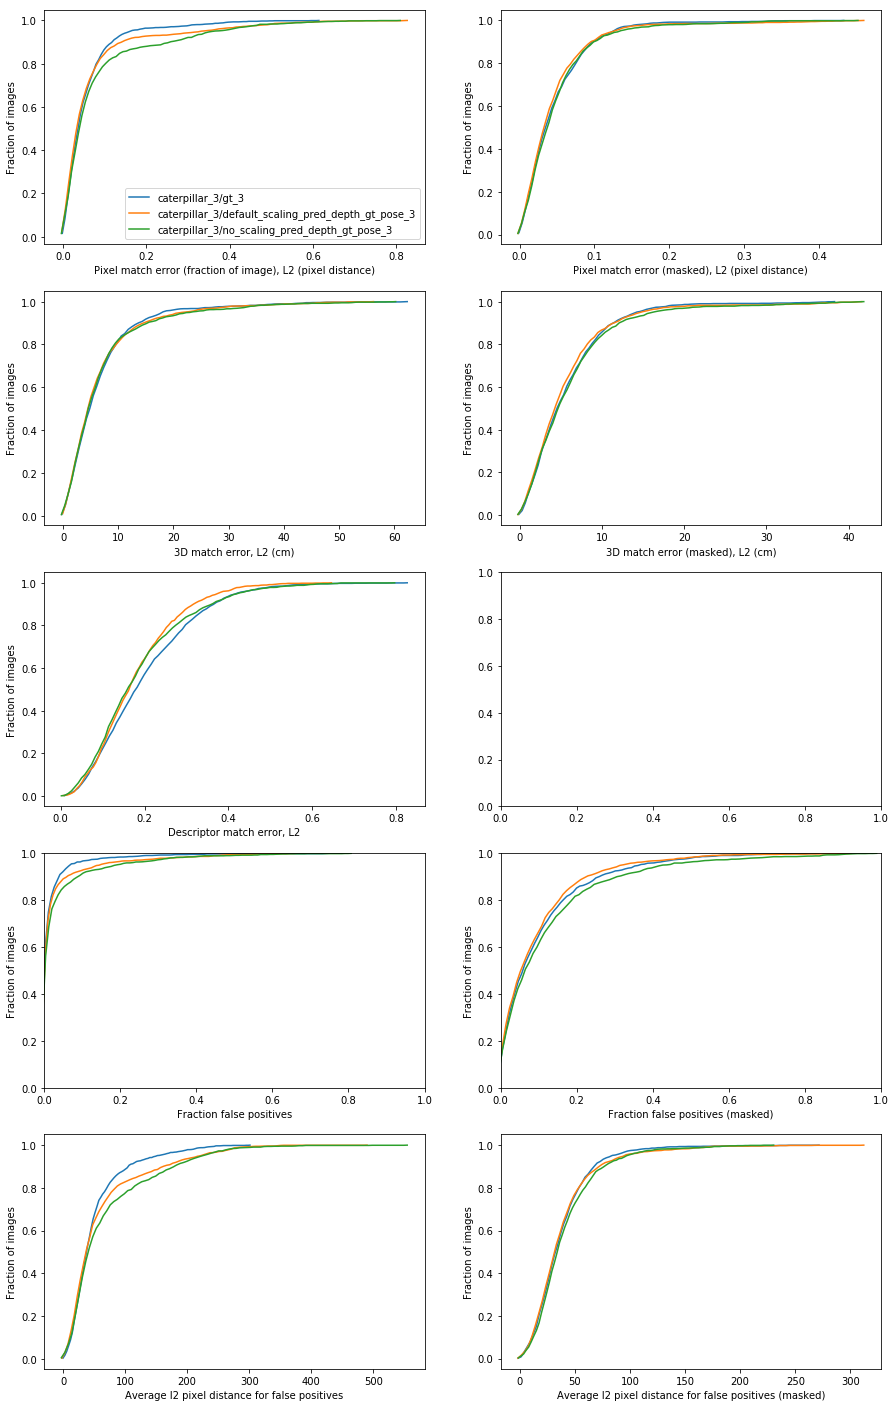

In [4]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir,".." ,"data", "pdc", "trained_models", network_name, "analysis/train/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir,"..", "data", "pdc", "trained_models", network_name, "analysis/train/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Training Set")
plt.show()

# Test
Evaluate the network on the test scenes. Correspondences are all within scene

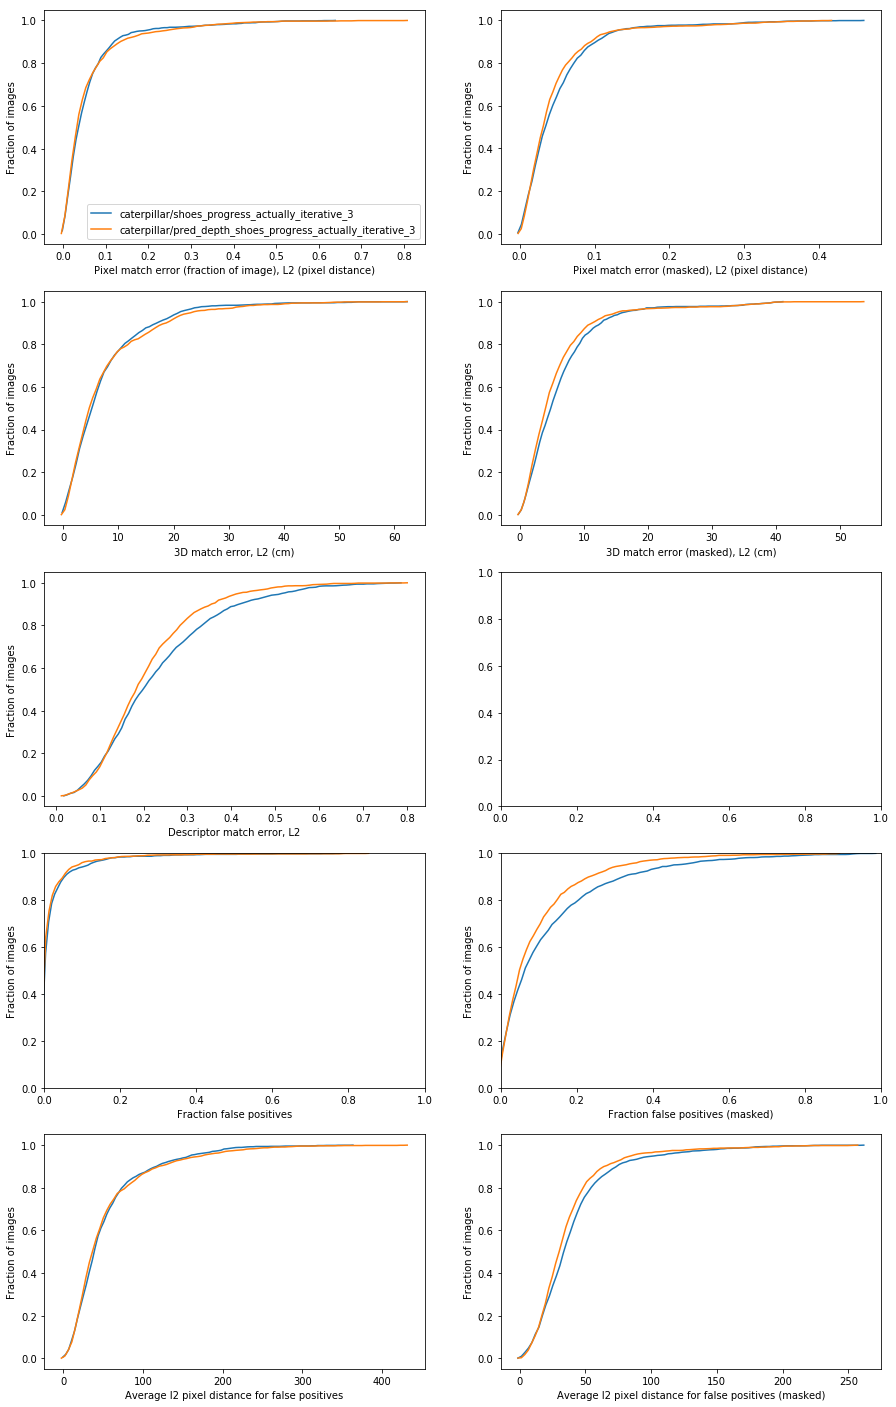

In [12]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data", "pdc", "trained_models", network_name, "analysis/test/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data", "pdc", "trained_models", network_name, "analysis/test/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Test Set")
plt.show()

## Cross Scene Single Object
Evaluate the network on correspondences that come from different scenes. These correspondences were manually annotated only for evaluation purposes.

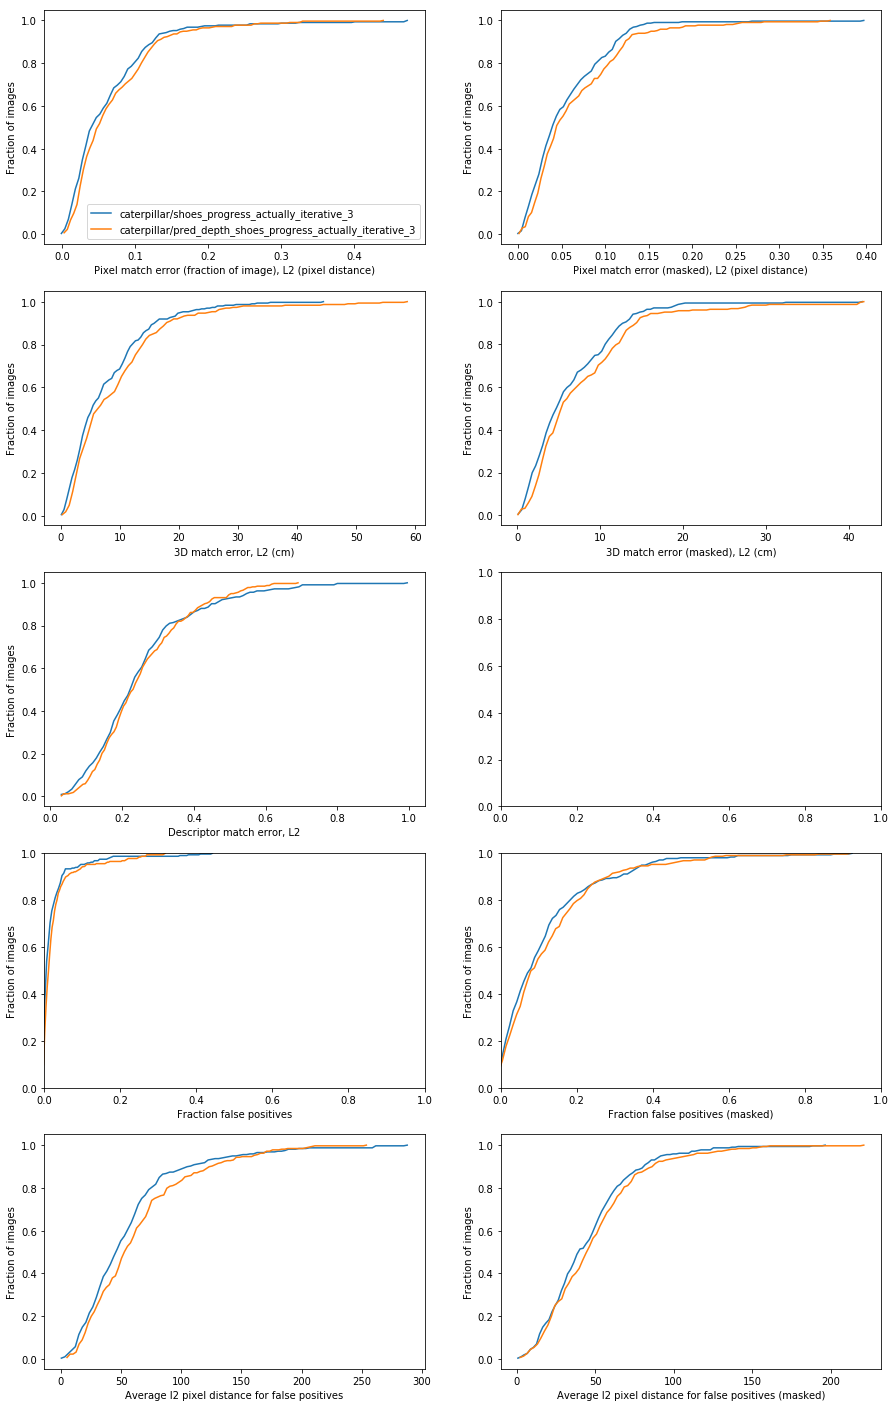

In [10]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data", "pdc", "trained_models", network_name, "analysis/cross_scene/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data", "pdc", "trained_models", network_name, "analysis/cross_scene/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Cross Scene Set")
plt.show()